### Import the necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Data Analysis

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]

5

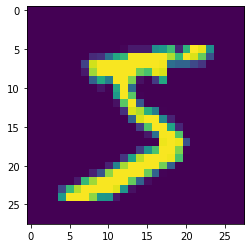

In [ ]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 199s 106ms/step - loss: 0.2318 - accuracy: 0.9502 - val_loss: 0.0814 - val_accuracy: 0.9729
Epoch 2/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0654 - accuracy: 0.9804 - val_loss: 0.0800 - val_accuracy: 0.9769
Epoch 3/5
1875/1875 [==============================] - 198s 105ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.0783 - val_accuracy: 0.9787
Epoch 4/5
1875/1875 [==============================] - 197s 105ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 0.0879 - val_accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 215s 115ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0907 - val_accuracy: 0.9784


### Test the model

In [ ]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09072951972484589, 0.9783999919891357]


In [ ]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 115ms/step
[[8.2371230e-09 2.3764674e-16 4.6732142e-11 9.4037034e-08 1.5842036e-17
  1.0037686e-14 1.5755432e-17 9.9999976e-01 2.5636754e-12 9.5170201e-08]
 [1.8395799e-11 3.5015192e-11 1.0000000e+00 3.2751874e-14 2.0842393e-18
  3.5924031e-20 1.5432146e-09 1.8702111e-18 1.9566675e-13 2.8295079e-17]
 [3.5417244e-12 9.9997902e-01 3.4266068e-07 1.4400112e-11 1.2028178e-05
  1.1833388e-09 1.0924631e-10 1.8128959e-10 8.5546963e-06 5.7128711e-11]
 [1.0000000e+00 9.3744075e-12 3.2155945e-12 1.0715590e-15 5.1583726e-15
  6.1744026e-14 5.8618472e-08 4.2794744e-16 7.3890075e-13 3.9695610e-13]]


In [ ]:
print(np.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Save the model

In [ ]:
model.save("model.h5")

### Test the saved model

In [ ]:
model=load_model("model.h5")

In [ ]:
img = Image.open("sample 1.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 74ms/step
0    2
Name: Label, dtype: int64


In [ ]:
!tar -zcvf model.tgz model.h5

model.h5


In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 5.0 MB/s 
     |████████████████████████████████| 55 kB 3.7 MB/s 
     |████████████████████████████████| 132 kB 50.1 MB/s 
     |████████████████████████████████| 79 kB 4.8 MB/s 
     |████████████████████████████████| 9.9 MB 44.6 MB/s 
     |████████████████████████████████| 140 kB 62.6 MB/s 
     |████████████████████████████████| 956 kB 58.2 MB/s 
     |████████████████████████████████| 135 kB 45.4 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=c69fd457fbada79e61d1ad506d9cf4275e6050bcb0683f62eef8d7dcd0fda583
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=9c5e3becd4b

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 51 kB 634 kB/s 
     |████████████████████████████████| 824 kB 38.5 MB/s 
     |████████████████████████████████| 133 kB 67.7 MB/s 
     |████████████████████████████████| 547 kB 56.1 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=740441808486d9dc656e3151f969a841b0f2fba8ed2681d3acd127ca0227763b
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=e673bc0c3230f79b3b359f1cc3400c3a6e4cd881cb3e2cac88a208df0593c21b
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [ ]:
from ibm_watson_machine_learning import APIClient
wml_credentials = { "url":"https://eu-de.ml.cloud.ibm.com","apikey":"ZGSfkP1ll21G5Af7WgU32-7yusMg3YFzxx-UmQPm16ai"}
client = APIClient(wml_credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'Digit',
    'scope': {'bss_account_id': 'a089ffa9a718451a9dd7379844d858e1'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '5e266285-2dd4-4faf-beea-5574be6a9f35',
      'bucket_region': 'eu-de-standard',
      'credentials': {'admin': {'access_key_id': '39c1699b23af49048b22c5482865158c',
        'api_key': 'g2CAjQS7BE_wSKsR4TJfcWn5HwWPKfDDPVazU4IUrvOC',
        'secret_access_key': '0ffdb8315168543fc9985297c4429bc108045038a92f3a04',
        'service_id': 'ServiceId-d75ce518-42c8-4433-9261-fc86168d4a9d'},
       'editor': {'access_key_id': '608cb195dae648e0bc9a63ddfb5bce25',
        'api_key': 'DUrEncQ7F2wfFXBx9BazdSvT4Y2pGUKKU3QXgeZX2_g-',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/a089ffa9a718451a9dd7379844d858e1:5c93ac1c-8ace-480d-b573-283b68f6c3e5::',
        'secret_access_key': 'c3839d08022c30515730f9f169757db119a50

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----  ------------------------
ID                                    NAME   CREATED
dbfb949a-7345-44b8-aea3-0bf3d0795525  Digit  2022-11-19T13:52:53.625Z
------------------------------------  -----  ------------------------


In [ ]:
space_uid="dbfb949a-7345-44b8-aea3-0bf3d0795525"
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model="model.tgz",meta_props={client.repository.ModelMetaNames.NAME:"digit",client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid})
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T17:33:56.857Z',
  'id': 'f3cef7c7-687e-4f96-a7a6-4f39cc4b1446',
  'modified_at': '2022-11-19T17:34:02.448Z',
  'name': 'digit',
  'owner': 'IBMid-665002P0D4',
  'resource_key': 'cfc984c4-7314-4e7a-a5aa-a6fea0dc4cef',
  'space_id': 'dbfb949a-7345-44b8-aea3-0bf3d0795525'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
#to download the tgz file any time
client.repository.download(model_id,'model_file.tgz')

Successfully saved model content to file: 'model_file.tgz'


'/content/model_file.tgz'